# Aparments and Houses Price Prediction
### Authors: 
Cagampang, Joseph Donee Y.<br>
Gucio, Maria Angelica<br>
Mondejar, Yanni Jan<br>
Rosalijos, Joshua<br>
Verdida, Kenneth Mae<br>

#### Date: March 18, 2021

In [86]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns 
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.preprocessing import LabelEncoder

In [87]:
# read the dataset
dataset_df = pd.read_csv('property24.csv')

# display the first five rows
display(dataset_df.head())

,Type,Location,Bedrooms,Bathrooms,Floor,Floors Area,Lot Area,Garage,Garden,Pet Friendly,Reservation Fee,Price,Link
0,House and Lot,Las Pinas City,2,1,2,67.0,55.0,1,yes,yes,0,3900001,2 bedroom House / Lot for sale in Las Pinas Ci...
1,House and Lot,Las Pinas City,3,2,2,78.0,58.0,1,yes,yes,30000,4987000,3 bedroom House / Lot for sale in Las Pinas Ci...
2,House and Lot,Quezon City,3,2,2,65.0,60.0,1,yes,yes,50000,4200000,3 bedroom House / Lot for sale in Quezon City ...
3,Townhouse,Las Pinas City,3,2,2,70.0,52.0,1,yes,yes,30000,4480000,3 bedroom Townhouse for sale in Las Pinas City...
4,House and Lot,Quezon City,3,2,2,65.0,48.0,1,yes,yes,50000,3800000,3 bedroom House / Lot for sale in Quezon City ...


### Data Cleaning

#### Check null values

In [88]:
# count total rows with null value
num_null =  dataset_df.isna().sum().sum()

# before removing null values
print('Before:')
print('null values: {0}'.format(num_null))
print('total instances: ', len(dataset_df))

# display what columns has null values
display(dataset_df.isnull().any())

# drop nulls
dataset_df = dataset_df.dropna()

# redisplay
display('-'*100)
display(dataset_df.isnull().any())

# after removing
num_null =  dataset_df.isna().sum().sum()

print('After:')
print('null values: {0}'.format(num_null))
print('total instances: ', len(dataset_df))

Before:
null values: 0
total instances:  365


Type               False
Location           False
Bedrooms           False
Bathrooms          False
Floor              False
Floors Area        False
Lot Area           False
Garage             False
Garden             False
Pet Friendly       False
Reservation Fee    False
Price              False
Link               False
dtype: bool

'----------------------------------------------------------------------------------------------------'

Type               False
Location           False
Bedrooms           False
Bathrooms          False
Floor              False
Floors Area        False
Lot Area           False
Garage             False
Garden             False
Pet Friendly       False
Reservation Fee    False
Price              False
Link               False
dtype: bool

After:
null values: 0
total instances:  365


#### Drop not needed column/s

In [89]:
dataset_df = dataset_df.drop(['Link'], axis=1)

#### Identify unique values of the categorical columns

In [90]:
type_values = dataset_df['Type'].unique()
location_values = dataset_df['Location'].unique()
garden_values = dataset_df['Garden'].unique()
pet_friendly_values = dataset_df['Pet Friendly'].unique()

print('Categorical Unique Values')

print('-'*100)
print('Location unique values: ')
print(location_values)

print('-'*100)
print('Type unique values: ')
print(type_values)

print('-'*100)
print('Garden: ')
print(garden_values)

print('-'*100)
print('Pet Friendly: ')
print(pet_friendly_values)

Categorical Unique Values
----------------------------------------------------------------------------------------------------
Location unique values: 
['Las Pinas City' 'Quezon City' 'Pasig City' 'Muntinlupa City'
 'Marikina City' 'Paranaque City' 'Caloocan City' 'Taguig City'
 'Manila City']
----------------------------------------------------------------------------------------------------
Type unique values: 
['House and Lot' 'Townhouse']
----------------------------------------------------------------------------------------------------
Garden: 
['yes' 'no']
----------------------------------------------------------------------------------------------------
Pet Friendly: 
['yes' 'no']


#### Check for duplicates

In [91]:
# removed duplicates
num_duplicates = len(dataset_df) - len(dataset_df.drop_duplicates(keep=False))

# before removing duplicates
print('Before:')
print('duplicates: {0}'.format(num_duplicates))
print('total instances: ', len(dataset_df))

# removed duplicates
dataset_df = dataset_df.drop_duplicates()

# afer removing
print('-'*100)
print('After:')
print('total instances: ', len(dataset_df))

Before:
duplicates: 73
total instances:  365
----------------------------------------------------------------------------------------------------
After:
total instances:  325


#### Variable Creation

In [92]:
# encode categorical variables
dummy_type = pd.get_dummies(dataset_df['Type'], prefix='Type')
dummy_location = pd.get_dummies(dataset_df['Location'], prefix='Location')
dummy_pet_friendly = pd.get_dummies(dataset_df['Pet Friendly'], prefix='Pet Friendly')
dummy_garden = pd.get_dummies(dataset_df['Garden'], prefix='Garden')


cleaned_df = dataset_df.drop(['Location', 'Type', 'Pet Friendly', 'Garden'], axis=1)

# only include n-1 for the created columns for the categorical variable
# to avoid dummy variable trap

cleaned_df['Type_Townhouse'] = dummy_type['Type_Townhouse']

cleaned_df['Location_Quezon City'] = dummy_location['Location_Quezon City']
cleaned_df['Location_Pasig City'] = dummy_location['Location_Pasig City']
cleaned_df['Location_Muntinlupa City'] = dummy_location['Location_Muntinlupa City']
cleaned_df['Location_Marikina City'] = dummy_location['Location_Marikina City']
cleaned_df['Location_Paranaque City'] = dummy_location['Location_Paranaque City']
cleaned_df['Location_Caloocan City'] = dummy_location['Location_Caloocan City']
cleaned_df['Location_Taguig City'] = dummy_location['Location_Taguig City']
cleaned_df['Location_Manila City'] = dummy_location['Location_Manila City']

cleaned_df['Type_Townhouse'] = dummy_type['Type_Townhouse']

cleaned_df['Garden_yes'] = dummy_garden['Garden_yes']
cleaned_df['Pet_Friendly_yes'] = dummy_pet_friendly['Pet Friendly_yes']


# Location
#   1. Las Pinas City
#   2. Quezon City
#   3. Pasig City
#   4. Muntinlupa City
#   5. Marikina City
#   6. Paranaque City
#   7. Caloocan City
#   8. Taguig City
#   9. Manila City

# Type
#   1. House and Lot
#   2. Townhouse

# Garden
#   1. Yes
#   2. No

# Pet Friendly
#   1. Yes
#   2. No

#### Convert data type

In [93]:
cleaned_df = cleaned_df.astype(float)

#### Check Multicollinearity

##### 1. Correlation Matrix

,Bedrooms,Bathrooms,Floor,Floors Area,Lot Area,Garage,Reservation Fee,Price,Type_Townhouse,Location_Quezon City,Location_Pasig City,Location_Muntinlupa City,Location_Marikina City,Location_Paranaque City,Location_Caloocan City,Location_Taguig City,Location_Manila City,Garden_yes,Pet_Friendly_yes
Bedrooms,1.000000,0.422390,0.221428,-0.002845,0.221494,0.025130,0.178954,-0.060355,-0.093073,0.208622,0.157944,-0.063535,0.280967,-0.143744,0.261479,0.135145,0.061205,0.059952,0.008408
Bathrooms,0.422390,1.000000,0.097281,0.016403,0.029846,0.060994,0.189817,-0.096228,-0.052444,0.015494,0.101488,0.013874,0.112300,0.049496,-0.017727,0.071314,-0.081133,0.017861,-0.027360
Floor,0.221428,0.097281,1.000000,0.012469,-0.020902,0.026722,0.035243,-0.031087,0.031529,-0.060316,0.121943,0.006078,0.040509,-0.055759,0.012108,0.330690,-0.112303,-0.010604,0.067515
Floors Area,-0.002845,0.016403,0.012469,1.000000,0.030094,-0.009932,-0.035964,0.069617,0.085372,0.094553,-0.006354,-0.016218,-0.024751,0.096248,-0.024496,-0.003366,-0.006178,0.062080,-0.038679
Lot Area,0.221494,0.029846,-0.020902,0.030094,1.000000,0.113410,0.041495,0.045502,-0.159871,0.001670,0.059005,-0.055032,0.059765,-0.031404,0.173462,0.053064,0.117554,0.008863,-0.002466
Garage,0.025130,0.060994,0.026722,-0.009932,0.113410,1.000000,-0.018849,0.027578,0.020545,0.010867,-0.019895,-0.021135,0.048684,-0.022941,-0.042100,-0.013980,-0.009855,-0.046626,0.039393
Reservation Fee,0.178954,0.189817,0.035243,-0.035964,0.041495,-0.018849,1.000000,-0.931474,0.075577,0.058936,-0.018814,-0.026714,0.122516,0.137973,0.037623,0.019317,-0.038163,0.047912,0.037207
Price,-0.060355,-0.096228,-0.031087,0.069617,0.045502,0.027578,-0.931474,1.000000,-0.130130,-0.031945,0.058750,0.005841,-0.054407,-0.141356,-0.110192,-0.028841,0.056897,-0.039635,-0.056415
Type_Townhouse,-0.093073,-0.052444,0.031529,0.085372,-0.159871,0.020545,0.075577,-0.130130,1.000000,-0.091237,-0.018862,0.041444,0.008573,0.108015,-0.068179,0.071210,0.089890,0.057590,0.078291
Location_Quezon City,0.208622,0.015494,-0.060316,0.094553,0.001670,0.010867,0.058936,-0.031945,-0.091237,1.000000,-0.066936,-0.071108,-0.168916,-0.124249,-0.141648,-0.047035,-0.033156,0.040451,0.100537


<AxesSubplot:>

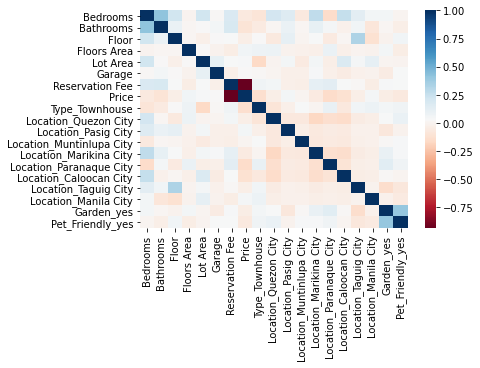

In [94]:
# calculate the correlation matrix
corr = cleaned_df.corr()

# display the correlation matrix
display(corr)

# plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

##### 2. Variance Inflation Factor

In [95]:
# Price is drop because it is dependent variable
cleaned_df_check = cleaned_df.drop(columns=['Price',])

# the VFI does expect a constant term in the data, so we need to add one using the add_constant method
X1 = sm.tools.add_constant(cleaned_df_check)

# create the series for before the drop
series = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)

# display the series
print('VIF score')
print('-'*100)
display(series)

VIF score
----------------------------------------------------------------------------------------------------


const                       71.960705
Bedrooms                     2.101989
Bathrooms                    1.341946
Floor                        1.239830
Floors Area                  1.049454
Lot Area                     1.149684
Garage                       1.038128
Reservation Fee              1.114123
Type_Townhouse               1.105361
Location_Quezon City         1.448772
Location_Pasig City          1.136628
Location_Muntinlupa City     1.040956
Location_Marikina City       1.463591
Location_Paranaque City      1.181385
Location_Caloocan City       1.431717
Location_Taguig City         1.215829
Location_Manila City         1.094219
Garden_yes                   1.276444
Pet_Friendly_yes             1.254238
dtype: float64

#### Check Outliers

In [96]:
# before removing outliers
print('Before:')
print('total instances: {0}'.format(len(cleaned_df)))

# filter the data frame to remove the values exceeding 3 standard deviations
cleaned_remove_df = cleaned_df[(np.abs(stats.zscore(cleaned_df)) < 3).all(axis=1)]

# what rows were removed
cleaned_outliers_df = cleaned_df.index.difference(cleaned_remove_df.index)

# total outliers
total_outliers = len(cleaned_outliers_df)

# assign the cleaned data (without outliers)
cleaned_df = cleaned_remove_df

# after removing outliers
print('-'*100)
print('After:')
print('outliers: ', cleaned_outliers_df.values)
print('total outliers index: ', len(cleaned_outliers_df))
print('cleaned instances: ', len(cleaned_df))

Before:
total instances: 325
----------------------------------------------------------------------------------------------------
After:
outliers:  [  8  11  17  26  28  30  33  44  45  49  54  56  67  71  72  74  84  86
  89  90  98 101 111 117 120 122 124 134 138 142 151 166 182 184 185 189
 192 199 203 230 258 265 288 300 301 306 314 315 325 331 332 334 341 342
 347 348 353]
total outliers index:  57
cleaned instances:  268


cleaned_df 
    
1. Check Null Values
2. Drop not needed column/s
3. Identify unique values of the categorical columns
4. Check for duplicates
5. Variable Creation
6. Check Multicollinearity
7. Check Outliers

In [109]:
# Function importing Dataset 
def importdata(): 
    proerty = cleaned_df
    # Printing the dataswet shape 
    print ("Dataset Length: ", len(proerty)) 
    print ("Dataset Shape: ", proerty.shape) 
    #balance_data = balance_data.apply(LabelEncoder().fit_transform)
    #balance_data = balance_data.astype(int)
    # Printing the dataset obseravtions 
    #print ("Dataset: ",balance_data.head()) 
    print(proerty['Price'])
    return proerty 


In [180]:
  
# Function to split the dataset 
def splitdataset(proerty): 
  
    # Separating the target variable 
    Y = proerty['Price'].values
    X = proerty.drop("Price", axis=1).values
   
   
    # Splitting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(  
    X, Y, test_size = 0.3, random_state = 100) 
      
    return X, Y, X_train, X_test, y_train, y_test 

In [181]:
# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 
  
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 


In [182]:
# Function to perform training with giniIndex. 
def test_using_gini(X_test,X_train, y_test): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 
  
    # Performing training 
    clf_gini.fit(X_test, y_test) 
    return clf_gini 

In [183]:
      
# Function to perform training with entropy. 
def tarin_using_entropy(X_train, X_test, y_train): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 


In [184]:
      
# Function to perform training with entropy. 
def test_using_entropy(X_test,X_train, y_test): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 
  
    # Performing training 
    clf_entropy.fit(X_test, y_test) 
    return clf_entropy 


In [185]:
# Function to make predictions 
def test_prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Test predicted values:") 
    print(y_pred) 
    return y_pred 


In [186]:
# Function to make predictions 
def train_prediction(X_train, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_train) 
    print("Train Predicted values:") 
    print(y_pred) 
    return y_pred 


In [187]:
      
# Function to calculate accuracy 
def cal_accuracy(y_test,y_train, y_pred, train_pred_gini): 
      
    print("Test Confusion Matrix: ")
    print(confusion_matrix(y_test, y_pred))
      
    print ("Test accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
    
    print ("Train accuracy : ", 
    accuracy_score(y_train,train_pred_gini)*100) 
      
    print("Report : ", 
    classification_report(y_test, y_pred)) 


In [188]:
  
# Driver code 
def main(): 
      
    # Building Phase 
    data = importdata() 
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data) 
    
    train_clf_gini = train_using_gini(X_train, X_test, y_train) 
    test_clf_gini = test_using_gini(X_test,X_train, y_test)  
    
    train_clf_entropy = tarin_using_entropy(X_train, X_test, y_train) 
    test_clf_entropy = test_using_entropy(X_test,X_train, y_test) 
    
      
    # Operational Phase 
    
    print("\nResults Using Gini Index:") 
      
    # Prediction using gini 
    test_pred_gini = test_prediction(X_test,test_clf_gini) 
    train_pred_gini = train_prediction(X_train,train_clf_gini) 
    cal_accuracy(y_test,y_train, test_pred_gini, train_pred_gini)
    
    
    print("\nResults Using Entropy:") 
    #Prediction using entropy 
    test_pred_entropy = test_prediction(X_test, test_clf_entropy) 
    train_pred_entropy = train_prediction(X_train, train_clf_entropy) 
    
    cal_accuracy(y_test, y_train,test_pred_entropy, train_pred_entropy) 


In [189]:
# Calling main function 
if __name__=="__main__": 
    main() 
    

Dataset Length:  268
Dataset Shape:  (268, 19)
0      3900001.0
1      4987000.0
2      4200000.0
3      4480000.0
4      3800000.0
         ...    
359    3450000.0
361    3500000.0
362    4194000.0
363    3900000.0
364    4980000.0
Name: Price, Length: 268, dtype: float64

Results Using Gini Index:
Test predicted values:
[3858000. 3858000. 3858000. 3858000. 4961000. 3858000. 3858000. 3858000.
   30000. 3858000. 3858000. 3858000.   30000. 3858000. 4961000. 3900000.
 3858000. 4961000. 3858000. 3858000. 3858000. 4961000. 3858000. 3858000.
 3858000. 3900000. 3858000. 3858000. 3858000. 3858000. 4961000. 3858000.
 3858000. 4961000. 3900000. 3900000. 3858000. 4961000. 3858000. 3858000.
 3858000. 3858000. 3858000.   30000. 3858000. 3858000. 4961000. 3858000.
 3858000. 3858000. 3858000. 3858000. 3858000. 3900000. 3858000. 3858000.
 3900000. 3858000. 3858000.   30000.   30000.   30000. 3858000. 4961000.
 3858000. 3858000. 3858000. 3900000. 4961000. 3858000. 3858000. 3900000.
 3858000.   30000.

C:\Users\Valued Client\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Valued Client\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [190]:
FEATURE_NAMES = ['Bedrooms', 'Bathrooms', 'Floor', 'Floors Area', 'Lot Area', 'Garage',
                 'Reservation Fee', 'Type_Townhouse', 'Location_Quezon City',
                 'Location_Pasig City', 'Location_Muntinlupa City',
                 'Location_Marikina City', 'Location_Paranaque City',
                 'Location_Caloocan City', 'Location_Taguig City',
                 'Location_Manila City', 'Garden_yes', 'Pet_Friendly_yes']
#esktop/2nd semester/sample/Transformed Data Set.csv
#iris = datasets.load_iris()
X = cleaned_df.drop('Price', axis = 1)
y = cleaned_df['Price']
#X = pd.DataFrame(iris.data, columns = FEATURE_NAMES)
#y = iris.target


In [191]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

In [192]:
from sklearn.tree import export_graphviz
export_graphviz(model, 'tree.dot', feature_names = FEATURE_NAMES)

In [193]:
from subprocess import check_call
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])

0

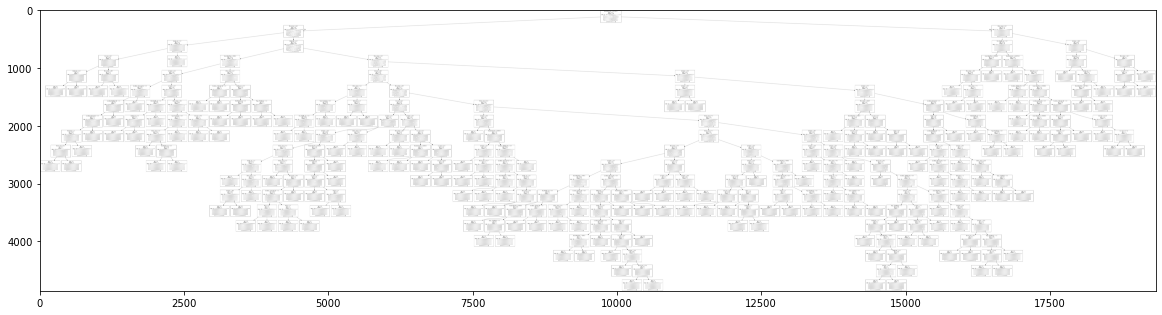

In [194]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)